In [80]:
import uproot
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', size=18)

In [81]:
nano_df = []
for nano_baby in glob.glob("output/ttbar-monolep*"):
    nano_df.append(((uproot.open(nano_baby)).get("tree")).pandas.df())
nano_df = pd.concat(nano_df)

## 1. Sanity Checks

In [82]:
nano_df.columns

Index([u'event', u'ht', u'met', u'deepCSV_btags_loose',
       u'deepCSV_btags_medium', u'deepCSV_btags_tight', u'deepJet_btags_loose',
       u'deepJet_btags_medium', u'deepJet_btags_tight', u'lepton_id',
       u'lepton_pt', u'lepton_pt_corr', u'lepton_eta', u'lepton_phi',
       u'fake_id', u'fake_pt', u'fake_pt_corr', u'fake_eta', u'fake_phi',
       u'fake_unmatched', u'fake_from_b', u'fake_from_c', u'fake_from_light'],
      dtype='object')

In [83]:
fake_els_df = nano_df[nano_df.fake_id.abs() == 11] # Tight single-muon events w/ tight fake electron
fake_mus_df = nano_df[nano_df.fake_id.abs() == 13] # Tight single-muon events w/ tight fake electron

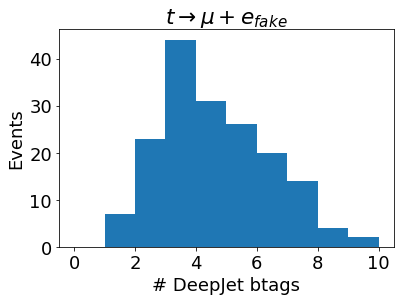

In [111]:
plt.hist(fake_els_df.deepJet_btags_loose, bins=[0,1,2,3,4,5,6,7,8,9,10]);

plt.title(r"$t\rightarrow \mu+e_{fake}$")
plt.xlabel("# DeepJet btags");
plt.ylabel("Events");

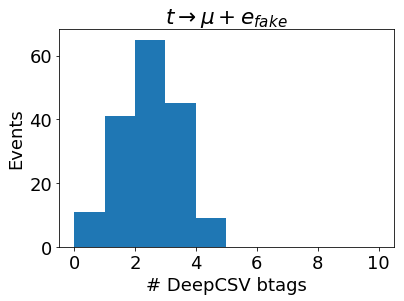

In [113]:
plt.hist(fake_els_df.deepCSV_btags_loose, bins=[0,1,2,3,4,5,6,7,8,9,10]);

plt.title(r"$t\rightarrow \mu+e_{fake}$")
plt.xlabel("# DeepCSV btags");
plt.ylabel("Events");

## 2. Plots

In [138]:
def lineage_hist(df, n_btags=0, algo="deepCSV", wp="loose",
                 fig=None, axes=None, fmt="bo", label="",
                 b_text=True):
    if not fig or not axes:
        fig = plt.figure(figsize=(6.4*1.5,4.8*1.5))
        axes = plt.subplot(111)
    # Bin sizes
    bin_edges = np.arange(5)[1:]
    bin_widths = bin_edges[1:]-bin_edges[:-1]
    bin_centers = bin_edges[:-1]+0.5*bin_widths
    # Bin values
    bin_vals = np.zeros(4)
    deepalgo_btags = df["{0}_btags_{1}".format(algo, wp)]
    bin_vals[0] = np.sum(df[deepalgo_btags >= n_btags].fake_from_c)
    bin_vals[1] = np.sum(df[deepalgo_btags >= n_btags].fake_from_b)
    bin_vals[2] = np.sum(df[deepalgo_btags >= n_btags].fake_from_light)
    bin_vals[3] = np.sum(df[deepalgo_btags >= n_btags].fake_unmatched)
    # Plot
    axes.errorbar(bin_edges, bin_vals, xerr=0.5, fmt=fmt, label=label);
    # Labels
    if b_text:
        plt.text(2, bin_vals[1]+1, "{:0.3f}%".format(100.0*bin_vals[1]/np.sum(bin_vals)))
    # Plot formatting
    plt.xticks(bin_edges, ["c", "b", "light/other", "unmatched"]);
    plt.ylabel("Events");
    plt.grid()

## 3. Fake electrons
From several samples of single-lepton $t\bar{t}$, where we require (at the generator level) $t\rightarrow W\rightarrow \mu$, i.e. we truth match to a single-muon event, then require both a tight $\mu$ (prompt) and a tight $e$ (non-prompt) in reco.

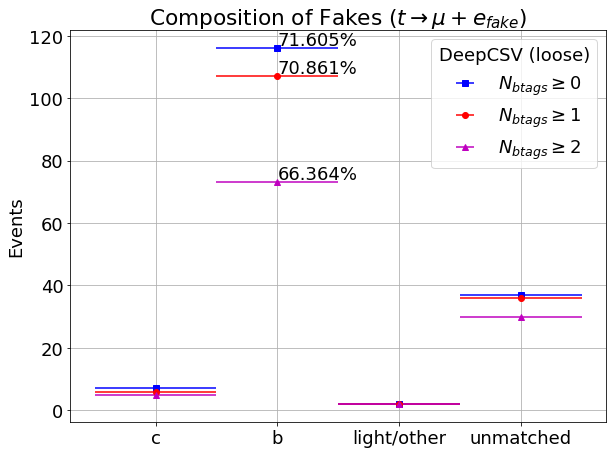

In [139]:
fig = plt.figure(figsize=(6.4*1.5,4.8*1.5))
axes = plt.subplot(111)

lineage_hist(fake_els_df, n_btags=0, algo="deepCSV", wp="loose",
             fig=fig, axes=axes,fmt="bs", label=r"$N_{btags}\geq 0$")
lineage_hist(fake_els_df, n_btags=1, algo="deepCSV", wp="loose",
             fig=fig, axes=axes, fmt="ro", label=r"$N_{btags}\geq 1$")
lineage_hist(fake_els_df, n_btags=2, algo="deepCSV", wp="loose",
             fig=fig, axes=axes, fmt="m^", label=r"$N_{btags}\geq 2$")

plt.title(r"Composition of Fakes ($t\rightarrow \mu+e_{fake}$)");
plt.legend(title="DeepCSV (loose)");

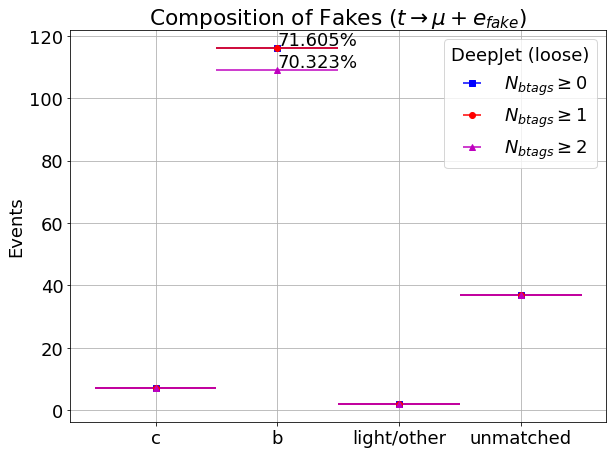

In [140]:
fig = plt.figure(figsize=(6.4*1.5,4.8*1.5))
axes = plt.subplot(111)

lineage_hist(fake_els_df, n_btags=0, algo="deepJet", wp="loose",
             fig=fig, axes=axes,fmt="bs", label=r"$N_{btags}\geq 0$")
lineage_hist(fake_els_df, n_btags=1, algo="deepJet", wp="loose",
             fig=fig, axes=axes, fmt="ro", label=r"$N_{btags}\geq 1$",
             b_text=False)
lineage_hist(fake_els_df, n_btags=2, algo="deepJet", wp="loose",
             fig=fig, axes=axes, fmt="m^", label=r"$N_{btags}\geq 2$")

plt.title(r"Composition of Fakes ($t\rightarrow \mu+e_{fake}$)");
plt.legend(title="DeepJet (loose)");